In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def obj_func(xk):
    x, y = xk
    return x ** 2 + x * y + 10 * y ** 2 - 22 * y - 5 * x


def obj_grad(xk):
    x, y = xk
    return np.array([2 * x + y - 5, x + 20 * y - 22])

In [3]:
from functools import partial
from scipy.optimize import line_search

In [9]:
def backtrack(xk, fk, gfk, t):
    assert t > 0, "'a' must be > 0"
    pk = -gfk
    a = 0.1
    b = 0.5
    while obj_func(xk + t * pk) > fk - a * t * np.dot(gfk, pk):
        t = b * t
    return t

| 1 | 6.00 | -1.00 | 48.0000 |
| 2 | 5.62 | 1.25 | 32.0000 |
| 3 | 4.69 | 0.17 | -1.3281 |
| 4 | 4.40 | 1.04 | -4.1450 |
| 5 | 3.19 | 0.24 | -10.1149 |
| 6 | 3.09 | 1.11 | -9.7500 |
| 7 | 2.80 | 0.69 | -14.5545 |
| 8 | 2.72 | 1.03 | -14.6511 |
| 9 | 2.54 | 0.87 | -15.4518 |
| 10 | 2.42 | 1.13 | -15.6099 |
| 11 | 2.36 | 0.94 | -15.6040 |
| 12 | 2.28 | 1.04 | -15.8576 |
| 13 | 2.20 | 0.90 | -15.8933 |
| 14 | 2.18 | 1.01 | -15.8817 |
| 15 | 2.14 | 0.96 | -15.9628 |
| 16 | 2.11 | 1.04 | -15.9703 |
| 17 | 2.09 | 0.98 | -15.9641 |
| 18 | 2.07 | 1.02 | -15.9902 |
| 19 | 2.06 | 0.99 | -15.9916 |
| 20 | 2.05 | 1.00 | -15.9961 |
| 21 | 2.03 | 0.99 | -15.9974 |
| 22 | 2.03 | 1.00 | -15.9976 |
| 23 | 2.02 | 0.99 | -15.9990 |
| 24 | 2.02 | 1.01 | -15.9993 |
| 25 | 2.02 | 1.00 | -15.9993 |
| 26 | 2.01 | 1.00 | -15.9997 |
| 27 | 2.01 | 1.00 | -15.9998 |
| 28 | 2.01 | 1.00 | -15.9998 |
| 29 | 2.01 | 1.00 | -15.9999 |
| 30 | 2.00 | 1.00 | -15.9999 |
| 31 | 2.00 | 1.00 | -15.9999 |
| 32 | 2.00 | 1.00 | 

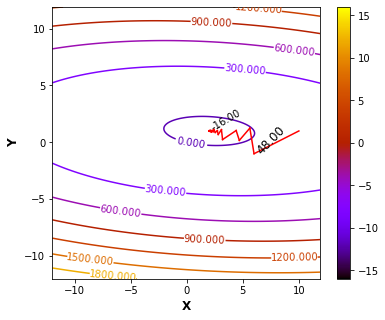

In [15]:
# Visualize contour plot of given surface
xy_lim = 12
x_axis = np.arange(-xy_lim, xy_lim, 0.1)
y_axis = np.arange(-xy_lim, xy_lim, 0.1)
x_mesh, y_mesh = np.meshgrid(x_axis, y_axis)
surface = obj_func(np.array([x_mesh, y_mesh]))

# Setup colorbar
mappable = plt.cm.ScalarMappable(cmap=plt.cm.gnuplot)
mappable.set_array(surface)
mappable.set_clim(np.min(surface), -np.min(surface))

# Make plot
fig = plt.figure(figsize=(6, 5))
levels = plt.contour(x_mesh, y_mesh, surface, cmap="gnuplot")
plt.clabel(levels)
fig.colorbar(mappable)

xk = np.array([10, 1])

error = 1e9
k = 0
while error > 1e-4:
    prev = xk

    fk = obj_func(xk)
    gfk = obj_grad(xk)
    a = backtrack(xk, fk, gfk, 1)
    xk = xk - a * gfk
    print("| %d" % (k + 1),"| %.2f" % xk[0], "| %.2f" % xk[1], "| %.4f |" % fk)
    error = np.linalg.norm(gfk, ord=2)
    plt.plot([prev[0], xk[0]], [prev[1], xk[1]], color="red")
    if k == 0:
        plt.text(xk[0], xk[1], "%.2f" % fk, rotation=45, fontsize=12)
    k += 1
plt.text(xk[0], xk[1], "%.2f" % fk, rotation=30, fontsize=10)
print("\niters = %d" % k)
print("error = %.4f" % error)
print("last a = %.4f" % a)
print("min val = %.4f" % obj_func(xk))
print(xk)
plt.xlabel("X", fontsize=12, fontweight=900)
plt.ylabel("Y", fontsize=12, fontweight=900)
plt.show()

In [286]:
def obj_func(xk, n=3):
    return 0.25 * (xk[0] - 1) ** 2 + sum(
        [(2 * xk[i - 1] ** 2 - xk[i] - 1) ** 2 for i in range(1, n)]
    )

def obj_grad(xk, n=3):
    grad = []
    for i in range(n):
        if i == 0:
            a = 0.5 * (xk[i] - 1)
            c = 0
        else:
            a = 0
            c = -2 * (2 * xk[i - 1] ** 2 - xk[i] - 1)

        if i == n - 1:
            b = 0
        else:
            b = 8 * xk[i] * (2 * xk[i] ** 2 - xk[i + 1] - 1)

        grad.append(a + b + c)
    return np.array(grad)

In [287]:
def backtrack(xk, fk, gfk, t):
    assert t > 0, "'a' must be > 0"
    pk = -gfk
    a = 0.1
    b = 0.1
    while obj_func(xk + t * pk, n=len(xk)) > fk - a * t * np.dot(gfk, pk):
        t = b * t
    return t

In [325]:
# # Visualize contour plot of given surface
# xy_lim = 4
# x_axis = np.arange(-xy_lim, xy_lim, 0.1)
# y_axis = np.arange(-xy_lim, xy_lim, 0.1)
# x_mesh, y_mesh = np.meshgrid(x_axis, y_axis)
# surface = obj_func(np.array([x_mesh, y_mesh]), n=2)

# # Setup colorbar
# mappable = plt.cm.ScalarMappable(cmap=plt.cm.gnuplot)
# mappable.set_array(surface)
# mappable.set_clim(np.min(surface), np.max(surface))

# # Make plot
# fig = plt.figure(figsize=(6, 5))
# levels = plt.contour(x_mesh, y_mesh, surface, cmap="gnuplot")
# plt.clabel(levels)
# fig.colorbar(mappable)

n = 11
xk = np.concatenate([np.array([-1.5]), np.ones(n - 1)])

k = 0
error = 1e8
while error > 1e-3:
    fk = obj_func(xk, n=n)
    gfk = obj_grad(xk, n=n)
    a = backtrack(xk, fk, gfk, 1)
#     a = 0.1
    xk = xk - a * gfk
    error = np.linalg.norm(gfk, ord=2)
    k += 1
print(xk.shape)
print(k, error, obj_func(xk, n=n))

(11,)
48 0.0008271657977090777 9.239611135024581e-09


In [326]:
from scipy.optimize import minimize

In [327]:
n = 11
xk = np.concatenate([np.array([-1.5]), np.ones(n - 1)])
minimize(obj_func, xk)

      fun: 2.4221039922212757e-12
 hess_inv: array([[  1.9942362 ,   7.98293075,  31.91926276,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  7.98293075,  32.40751931, 129.60968948,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [ 31.91926276, 129.60968948, 518.83294347,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   1.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.      

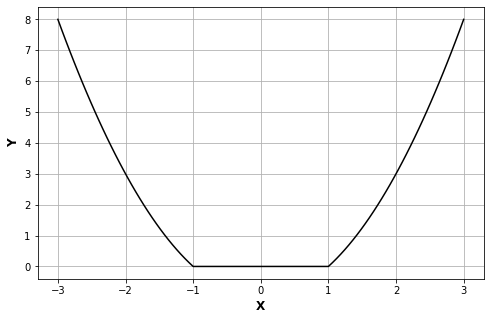

In [328]:
plt.figure(figsize=(8, 5))
x = np.linspace(-3,3,100)
y = x ** 2 -1
y[y<=0] = 0
plt.plot(x, y, color="black")
plt.xlabel("X", fontsize=12, fontweight=900)
plt.ylabel("Y", fontsize=12, fontweight=900)
plt.grid()
plt.show()